Question 1:

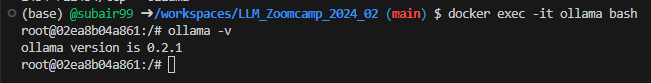

Question 2:

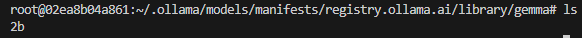

Question 3:

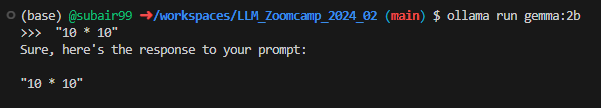

Question 4:

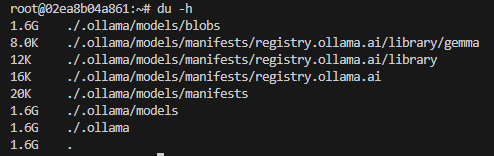

In [1]:
!rm -f minsearch.py
!wget https://raw.githubusercontent.com/alexeygrigorev/minsearch/main/minsearch.py

--2024-07-09 22:50:29--  https://raw.githubusercontent.com/alexeygrigorev/minsearch/main/minsearch.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3832 (3.7K) [text/plain]
Saving to: ‘minsearch.py’

minsearch.py        100%[===================>]   3.74K  --.-KB/s    in 0s      

2024-07-09 22:50:29 (23.4 MB/s) - ‘minsearch.py’ saved [3832/3832]



In [2]:
import requests 
import minsearch

docs_url = 'https://github.com/DataTalksClub/llm-zoomcamp/blob/main/01-intro/documents.json?raw=1'
docs_response = requests.get(docs_url)
documents_raw = docs_response.json()

documents = []

for course in documents_raw:
    course_name = course['course']

    for doc in course['documents']:
        doc['course'] = course_name
        documents.append(doc)

index = minsearch.Index(
    text_fields=["question", "text", "section"],
    keyword_fields=["course"]
)

index.fit(documents)

In [3]:
def search(query):
    boost = {'question': 3.0, 'section': 0.5}

    results = index.search(
        query=query,
        filter_dict={'course': 'data-engineering-zoomcamp'},
        boost_dict=boost,
        num_results=5
    )

    return results

In [4]:
def build_prompt(query, search_results):
    prompt_template = """
You're a course teaching assistant. Answer the QUESTION based on the CONTEXT from the FAQ database.
Use only the facts from the CONTEXT when answering the QUESTION.

QUESTION: {question}

CONTEXT: 
{context}
""".strip()

    context = ""
    
    for doc in search_results:
        context = context + f"section: {doc['section']}\nquestion: {doc['question']}\nanswer: {doc['text']}\n\n"
    
    prompt = prompt_template.format(question=query, context=context).strip()
    return prompt

def llm(prompt):
    response = client.chat.completions.create(
        model='gemma:2b',
        messages=[{"role": "user", "content": prompt}]
    )
    
    return response.choices[0].message.content

In [5]:
def rag(query):
    search_results = search(query)
    prompt = build_prompt(query, search_results)
    answer = llm(prompt)
    return answer

In [6]:
from openai import OpenAI

client = OpenAI(
    base_url='http://localhost:11434/v1/',
    api_key='ollama',
)

In [7]:
prompt = "What's the formula for energy?"

In [8]:
llm(prompt)

"Sure. Here's the formula for the energy of an object:\n\n**E = K + U**\n\nwhere:\n\n* **E** is the energy\n* **K** is the kinetic energy\n* **U** is the potential energy\n\n**Kinetic energy** (K) is the energy an object possesses when it moves. It is calculated as half the mass of an object multiplied by its velocity squared:\n\n**K = 1/2 * m * v^2**\n\nwhere:\n\n* **m** is the mass of the object\n* **v** is its velocity\n\n**Potential energy** (U) is the energy an object possesses when it is in a specific position or state. It is calculated as the product of the force acting on the object and its position.\n\n**Force** is the interaction between two objects, and it can be calculated as the product of the masses of the objects and their gravitational constant.\n\n**Position** can refer to the height of an object, the distance from a reference point, or any other relevant measure of its position.\n\nThe energy of an object is a measure of its ability to do work. The total energy of an 

In [9]:
print(_)

Sure. Here's the formula for the energy of an object:

**E = K + U**

where:

* **E** is the energy
* **K** is the kinetic energy
* **U** is the potential energy

**Kinetic energy** (K) is the energy an object possesses when it moves. It is calculated as half the mass of an object multiplied by its velocity squared:

**K = 1/2 * m * v^2**

where:

* **m** is the mass of the object
* **v** is its velocity

**Potential energy** (U) is the energy an object possesses when it is in a specific position or state. It is calculated as the product of the force acting on the object and its position.

**Force** is the interaction between two objects, and it can be calculated as the product of the masses of the objects and their gravitational constant.

**Position** can refer to the height of an object, the distance from a reference point, or any other relevant measure of its position.

The energy of an object is a measure of its ability to do work. The total energy of an object is always conserved